# Plotting Notebook
Please use this is a guide to the type plots that you can create, as examples of the `hist`, `mplhep`, and other packages, as well as the use of the various functions that we have written in `plot_utils.py`. <br>
Use the the Table of Contents in Jupyter to view the different sections of the notebook to help navigating it.

In [1]:
%load_ext autoreload

In [2]:
%autoreload 1

In [3]:
import os, sys, glob, random
import pickle
import math
import multiprocessing
import itertools
import warnings
import json
import time
import numpy as np
from typing import Dict, List
from rich import print
from rich.pretty import pprint
from rich.console import Console
from rich.table import Table
from rich.progress import Progress, track
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
from cycler import cycler
import hist
from hist import Hist
import mplhep as hep
from tabulate import tabulate
import scipy
from scipy.special import binom
import uproot
import ROOT
from iminuit import Minuit
from iminuit.cost import LeastSquares
from jacobi import propagate
%aimport plot_utils
%aimport plot_utils_extras
%aimport fill_utils
%aimport generic_utils

In [4]:
warnings.filterwarnings('ignore')
mpl.rcParams.update({'figure.max_open_warning': 0})
mpl.rcParams['figure.facecolor'] = 'white'
hep.style.use("CMS")
np.set_printoptions(suppress=True)

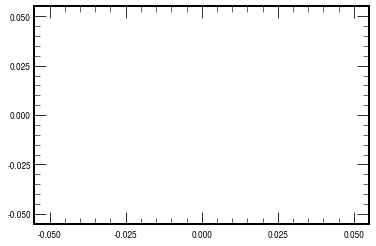

In [5]:
plt.plot()
hep.style.use(hep.style.CMS)
mpl.rcParams['figure.facecolor'] = 'white'

In [6]:
print("The following output directories are available:")
!ls | grep output_histograms

The following output directories are available:

CR_cb_34mu_output_histograms
CR_cb_combine_output_histograms
CR_cb_output_histograms
CR_cb_postDYstudy_output_histograms
CR_light_postDYstudy_output_histograms
CR_prompt_34mu_leading_output_histograms
CR_prompt_34mu_output_histograms
CR_prompt_combine_output_histograms
CR_prompt_dimuon_output_histograms
CR_prompt_dystudy_output_histograms
CR_prompt_leading_output_histograms
CR_prompt_output_histograms
CR_prompt_postDYstudy_output_histograms
DYstudy_2_output_histograms
DYstudy_3_output_histograms
DYstudy_4_output_histograms
DYstudy_5_output_histograms
DYstudy_output_histograms
DYstudy_trigger_match_double_output_histograms
DYstudy_trigger_match_triple_output_histograms
DYstudy_trigger_one_path_output_histograms
fake_rate_output_histograms
kinematics_output_histograms
nbjet_comparison_output_histograms
SR_combine_new_trigger_output_histograms
SR_combine_old_trigger_output_histograms
SR_combine_output_histograms
SR_extrapolation_new_from_mini_output_histograms
SR_extrapolation_new_output_

## Load plots

In [99]:
plots = generic_utils.loader(tag="fake_rate", load_data=True, custom_lumi=573.120134)

These are all the samples loaded.

In [100]:
keys = list(plots.keys())
pprint(keys)

[
│   'GluGluToSUEP_mS1000.000_mPhi1.000_T0.250_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi1.400_T0.350_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi1.400_T1.400_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi1.400_T2.800_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi1.400_T5.600_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi2.000_T2.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi2.000_T2.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi2.000_T4.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi2.000_T4.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi2.000_T8.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi2.000_T8.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi4.000_T1.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi4.000_T1.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi4.000_T16.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi4.000_T16.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi4.000_T4.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi4.000_T4.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi4.000_T8.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi4.000_T8.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi6.000_T12.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi6.000_T12.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi6.000_T24.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi6.000_T24.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi6.000_T3.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi6.000_T3.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi6.000_T6.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi6.000_T6.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi8.000_T2.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi8.000_T2.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi8.000_T4.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi8.000_T4.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi8.000_T8.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi8.000_T8.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS125.000_mPhi1.000_T0.250_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS125.000_mPhi1.400_T0.350_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS125.000_mPhi1.400_T1.400_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS125.000_mPhi1.400_T2.800_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS125.000_mPhi1.400_T5.600_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS125.000_mPhi2.000_T2.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS125.000_mPhi2.000_T2.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS125.000_mPhi2.000_T4.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS125.000_mPhi2.000_T4.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS125.000_mPhi2.000_T8.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS125.000_mPhi2.000_T8.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS125.000_mPhi4.000_T1.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS125.000_mPhi4.000_T1.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS125.000_mPhi4.000_T16.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS125.000_mPhi4.000_T16.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS125.000_mPhi4.000_T4.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS125.000_mPhi4.000_T4.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS125.000_mPhi4.000_T8.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS125.000_mPhi4.000_T8.000

In [101]:
for key in plots['QCD_Pt_MuEnriched_2018'].keys():
    pprint(f"{key}")

'muon_pt_tight'

'muon_pt_inv'

'jet_pt_3I0T'

'jet_pt_0I3T'

'nMuon_inv_in_vs_nMuon_tight_in_vs_nMuon_inv_out_vs_nMuon_tight_out_vs_nMuon'

'nMuon_inv_vs_nMuon_tight_vs_nMuon'

'nMuon_vs_nJet_with_muon'

'nTight_in_jet_vs_nInverse_in_jet_vs_nMuon'

'btag_vs_muon_ip3d'

'btag_score_cut_vs_nTights_vs_nMuon'

'ip3d_cut_vs_nTights_vs_nMuon'

In [10]:
plots['QCD_Pt_MuEnriched_2018']['nMuon_inv_in_vs_nMuon_tight_in_vs_nMuon_inv_out_vs_nMuon_tight_out_vs_nMuon']

Hist(
  Regular(8, 0, 8, name='nMuon_inv_in'),
  Regular(8, 0, 8, name='nMuon_tight_in'),
  Regular(8, 0, 8, name='nMuon_inv_out'),
  Regular(8, 0, 8, name='nMuon_tight_out'),
  Regular(5, 3, 8, name='nMuon'),
  storage=Weight()) # Sum: WeightedSum(value=105882, variance=4.10424e+06)

In [11]:
plots['QCD_Pt_MuEnriched_2018']['nMuon_inv_vs_nMuon_tight_vs_nMuon']

Hist(
  Regular(8, 0, 8, name='nMuon_inv'),
  Regular(8, 0, 8, name='nMuon_tight'),
  Regular(5, 3, 8, name='nMuon'),
  storage=Weight()) # Sum: WeightedSum(value=105882, variance=4.10424e+06)

In [93]:
h0 = plots['QCD_Pt_MuEnriched_2018']['nMuon_inv_vs_nMuon_tight_vs_nMuon']
h1 = plots['QCD_Pt_MuEnriched_2018']['nMuon_inv_in_vs_nMuon_tight_in_vs_nMuon_inv_out_vs_nMuon_tight_out_vs_nMuon']

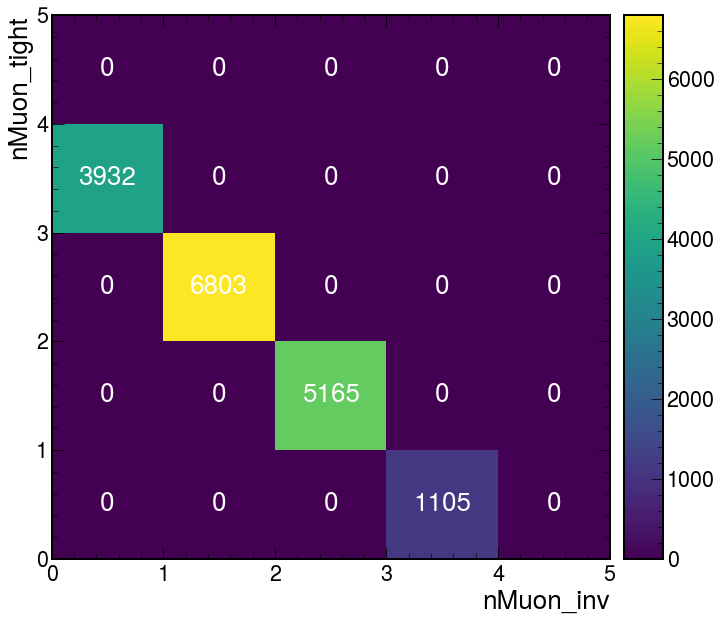

In [94]:
h0[:5j, :5j, 3j].plot2d()
for i in range(5):
    for j in range(5):
        text = plt.text(
            j+0.5, i+0.5, round(h0[:5j, :5j, 3j].values()[j, i]),
            ha="center", va="center", color="w"
        )
plt.show()

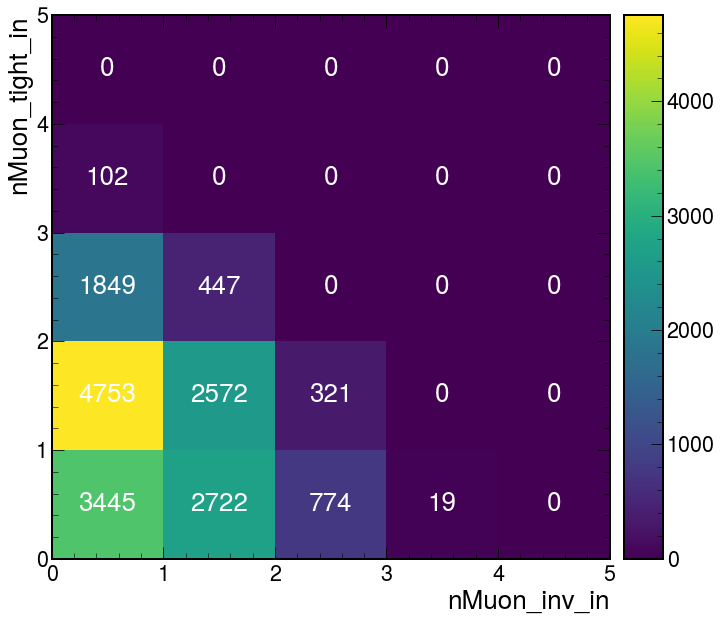

In [95]:
h1[:5j, :5j, ::sum, ::sum, 3j].plot2d()
for i in range(5):
    for j in range(5):
        text = plt.text(
            j+0.5, i+0.5, round(h1[:5j, :5j, ::sum, ::sum, 3j].values()[j, i]),
            ha="center", va="center", color="w"
        )

plt.show()

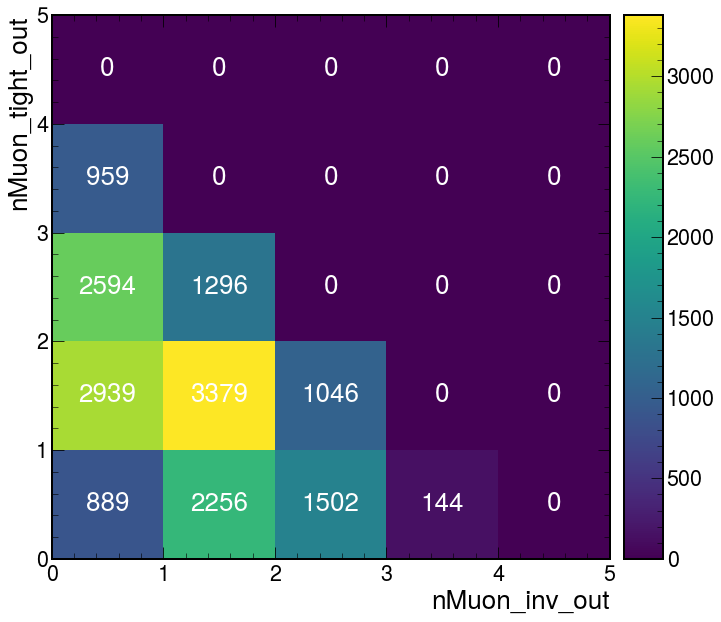

In [96]:
h1[::sum, ::sum, :5j, :5j, 3j].plot2d()
for i in range(5):
    for j in range(5):
        text = plt.text(
            j+0.5, i+0.5, round(h1[::sum, ::sum, :5j, :5j, 3j].values()[j, i]),
            ha="center", va="center", color="w"
        )
plt.show()

In [15]:
# This will give me the number of muons in the (I, in) category
acc = hist.accumulators.WeightedSum(0, 0)
for i in range(8):
    y = h1[i, ::sum, ::sum, ::sum, 4j]
    acc += hist.accumulators.WeightedSum(i * y.value, i * y.variance)
print(acc)

WeightedSum(value=2806.04, variance=27053.2)

In [16]:
# This will give me the number of muons in the I category
acc = hist.accumulators.WeightedSum(0, 0)
for i in range(8):
    y = h0[i, ::sum, 4j]
    acc += hist.accumulators.WeightedSum(i * y.value, i * y.variance)
print(acc)

WeightedSum(value=4328.92, variance=49522)

In [17]:
# This will give me the number of muons in the I category
acc = hist.accumulators.WeightedSum(0, 0)
for i in range(8):
    y1 = h1[i, ::sum, ::sum, ::sum, 4j]
    y2 = h1[::sum, ::sum, i, ::sum, 4j]
    acc += (
        hist.accumulators.WeightedSum(i * y1.value, i * y1.variance)
        + hist.accumulators.WeightedSum(i * y2.value, i * y2.variance)
    )
print(acc)

WeightedSum(value=4328.92, variance=49522)

In [18]:
# This will give me the number of muons in the I category
acc = hist.accumulators.WeightedSum(0, 0)
for i in range(8):
    y = h1[i, ::sum, ::sum, ::sum, 4j] + h1[::sum, ::sum, i, ::sum, 4j]
    acc += hist.accumulators.WeightedSum(i * y.value, i * y.variance)
print(acc)

WeightedSum(value=4328.92, variance=49522)

## Definitions

In [22]:
def get_f(n, N):
    """
    Calculates f by using the formula: f = 1 - (N_nI0T/N_n)^(1/n)
    """
    N_n = N[..., n*1j]
    value = 1 - (N_n[n*1j, 0].value / N_n.sum().value)**(1/n)
    unc = np.sqrt(
        N_n[n*1j, 0].variance / N_n[n*1j, 0].value**2 + N_n.sum().variance / N_n.sum().value**2
    ) * (1 - value) / n
    return value, unc

def get_f_full_stats(n, N):
    """
    Calculates f by using full stats: 
        f = N_n_tight / N_n_all = (N_(n-1)I1T + 2*N_(n-2)I2T + n*N_0InT) / (n*N_n)
    """
    N_n = N[..., n*1j]
    N_n_sum_tight = hist.accumulators.WeightedSum(0, 0)
    N_n_sum_all = (N_n * n).sum()
    for i in range(n + 1):
        N_mIkT = N_n[i * 1j, (n - i) * 1j]
        N_n_sum_tight += hist.accumulators.WeightedSum((n - i) * N_mIkT.value, (n - i) * N_mIkT.variance)
    f = N_n_sum_tight.value / N_n_sum_all.value
    delta_f = f * np.sqrt(
        N_n_sum_all.variance / N_n_sum_all.value**2 + N_n_sum_tight.variance / N_n_sum_tight.value**2
    )
    return f, delta_f

def get_f_in_out(N_n):
    """
    Calculates f by using full stats for histograms separated by in/out jet muons: 
        f = N_n_tight_in_jet / N_n_all_in_jet = N_n_tight_in_jet / (N_n_tight_in_jet + N_n_inv_in_jet)
    Input:
        N_n: histogram with 2 axes [nInv, nTight]
    """
    N_n_sum_tight = hist.accumulators.WeightedSum(0, 0)
    N_n_sum_all = hist.accumulators.WeightedSum(0, 0)
    
    for i in range(len(N_n.axes[0].edges) - 1):
        N_i_tight = N_n[::sum, i * 1j]
        N_i_all = N_n[i * 1j, ::sum] + N_n[::sum, i * 1j]
        N_n_sum_tight += hist.accumulators.WeightedSum(i * N_i_tight.value, i * N_i_tight.variance)
        N_n_sum_all += hist.accumulators.WeightedSum(i * N_i_all.value, i * N_i_all.variance)
    
    f = N_n_sum_tight.value / N_n_sum_all.value
    delta_f = f * np.sqrt(
        N_n_sum_all.variance / N_n_sum_all.value**2 + N_n_sum_tight.variance / N_n_sum_tight.value**2
    )
    return f, delta_f

def N_mIkT_est(m, k, f, delta_f, N_n):
    """
    Estimate N_mIkT using N_mIkT = binom(n, m) * (1-f)^m * f^k * N_n
    It will move the diagonals down in case there are less muons than nMuon (for subcategories)
    """
    n = m + k
    N_n_sum = hist.accumulators.WeightedSum(0, 0)
    for i, j in zip(range(8), range(8)):
        if (i+j) > n:
            continue
        N_n_sum += N_n[i*1j, j*1j]
    value = binom(n, m) * (1-f)**m * f**k * N_n_sum.value
    unc = binom(n, m) * (1-f)**(m-1) * f**(k-1) * np.sqrt(
        ((k - n * f) * N_n_sum.value * delta_f)**2 + ((1-f) * f * np.sqrt(N_n_sum.variance))**2
    )
    return value, unc

#def distribution_est(N)

## Estimation using the 2 category histogram

TypeError: unsupported operand type(s) for *: 'boost_histogram._core.accumulators.WeightedSum' and 'int'

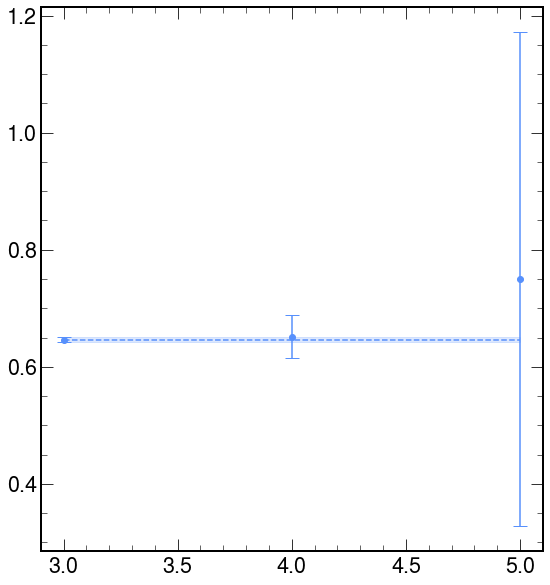

In [98]:
fig, ax = plt.subplots(figsize=(9, 10))

##################################################
# Data section
##################################################

process = "DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018"
hist_name = 'nMuon_inv_vs_nMuon_tight_vs_nMuon'

N = plots[process][hist_name]

nMuon_max = 5

f_arr, delta_f_arr = [], []
for nMuon in range(3, nMuon_max+1):
    f, delta_f = get_f_full_stats(nMuon, N)
    f_arr.append(f)
    delta_f_arr.append(delta_f)

f_arr, delta_f_arr = np.array(f_arr), np.array(delta_f_arr)

weights = 1 / delta_f_arr**2
f_average = np.sum(weights * f_arr) / np.sum(weights)
delta_f_average = np.sqrt(1/np.sum(weights))

plt.hlines(f_average, 3, nMuon_max, linestyles="dashed", color='C0')
plt.fill_between(
    list(range(3, nMuon_max+1)),
    f_average - delta_f_average,
    f_average + delta_f_average,
    alpha=0.2,
    color='C0',
)

plt.errorbar(
    list(range(3, nMuon_max+1)), 
    f_arr, 
    yerr=delta_f_arr, 
    capsize=7, 
    marker='o', 
    linestyle="none", 
    label="Data", 
    color='C0',
)

##################################################
# QCD section
##################################################

process = "QCD_Pt_MuEnriched_2018"
hist_name = 'nMuon_inv_vs_nMuon_tight_vs_nMuon'

nMuon_max = 5

N = plots[process][hist_name][::sum, ::sum, ...]

f_arr, delta_f_arr = [], []
for nMuon in range(3, nMuon_max+1):
    f, delta_f = get_f_full_stats(nMuon, N)
    f_arr.append(f)
    delta_f_arr.append(delta_f)

f_arr, delta_f_arr = np.array(f_arr), np.array(delta_f_arr)

weights = 1 / delta_f_arr**2
f_average = np.sum(weights * f_arr) / np.sum(weights)
delta_f_average = np.sqrt(1/np.sum(weights))

plt.hlines(f_average, 3, nMuon_max, linestyles="dashed", color='C1')
plt.fill_between(
    list(range(3, nMuon_max+1)),
    f_average - delta_f_average,
    f_average + delta_f_average,
    alpha=0.2,
    color='C1',
)

plt.errorbar(
    list(range(3, nMuon_max+1)), 
    f_arr, 
    yerr=delta_f_arr, 
    capsize=7, 
    marker='o', 
    linestyle="none", 
    label="QCD MC",
    color='C1',
)

# General plotting stuff
plt.xlabel("nMuon")
plt.ylabel("f")
hep.cms.label(llabel="Preliminary", data=True, lumi=0.57, ax=ax)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

## Estimation using the 4 category histogram

### Calculate & plot f as a function of nMuon for data and MC

KeyError: 'nMuon_inv_in_jet_vs_nMuon_tight_in_jet_vs_nMuon_inv_vs_nMuon_tight_vs_nMuon'

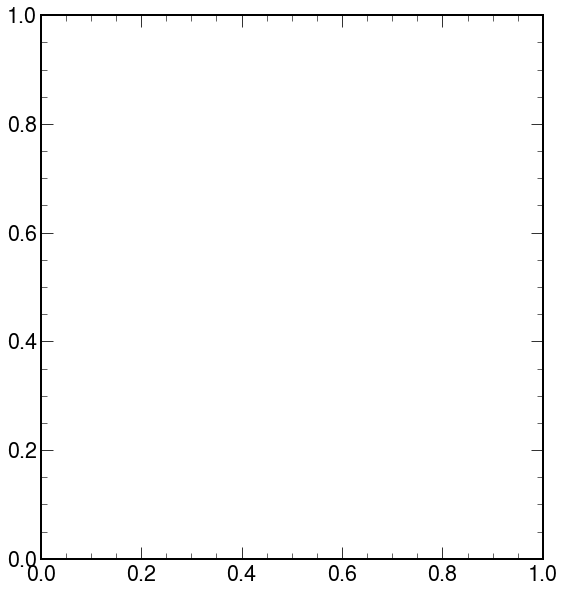

In [102]:
fig, ax = plt.subplots(figsize=(9, 10))

##################################################
# Data section
##################################################

process = "DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018"
hist_name = 'nMuon_inv_in_jet_vs_nMuon_tight_in_jet_vs_nMuon_inv_vs_nMuon_tight_vs_nMuon'

N = plots[process][hist_name]

# this histogram needs to be processed a bit first:
# N[::sum, :, ::sum, :, :]



nMuon_max = 5

f_arr, delta_f_arr = [], []
for nMuon in range(3, nMuon_max+1):
    f, delta_f = get_f_full_stats(nMuon, N)
    f_arr.append(f)
    delta_f_arr.append(delta_f)

f_arr, delta_f_arr = np.array(f_arr), np.array(delta_f_arr)

weights = 1 / delta_f_arr**2
f_average = np.sum(weights * f_arr) / np.sum(weights)
delta_f_average = np.sqrt(1/np.sum(weights))

plt.hlines(f_average, 3, nMuon_max, linestyles="dashed", color='C0')
plt.fill_between(
    list(range(3, nMuon_max+1)),
    f_average - delta_f_average,
    f_average + delta_f_average,
    alpha=0.2,
    color='C0',
)

plt.errorbar(
    list(range(3, nMuon_max+1)), 
    f_arr, 
    yerr=delta_f_arr, 
    capsize=7, 
    marker='o', 
    linestyle="none", 
    label="Data", 
    color='C0',
)

##################################################
# QCD section
##################################################

process = "QCD_Pt_MuEnriched_2018"
hist_name = 'nMuon_inv_in_jet_vs_nMuon_tight_in_jet_vs_nMuon_inv_vs_nMuon_tight_vs_nMuon'

nMuon_max = 5

N = plots[process][hist_name][::sum, ::sum, ...]

f_arr, delta_f_arr = [], []
for nMuon in range(3, nMuon_max+1):
    f, delta_f = get_f_full_stats(nMuon, N)
    f_arr.append(f)
    delta_f_arr.append(delta_f)

f_arr, delta_f_arr = np.array(f_arr), np.array(delta_f_arr)

weights = 1 / delta_f_arr**2
f_average = np.sum(weights * f_arr) / np.sum(weights)
delta_f_average = np.sqrt(1/np.sum(weights))

plt.hlines(f_average, 3, nMuon_max, linestyles="dashed", color='C1')
plt.fill_between(
    list(range(3, nMuon_max+1)),
    f_average - delta_f_average,
    f_average + delta_f_average,
    alpha=0.2,
    color='C1',
)

plt.errorbar(
    list(range(3, nMuon_max+1)), 
    f_arr, 
    yerr=delta_f_arr, 
    capsize=7, 
    marker='o', 
    linestyle="none", 
    label="QCD MC",
    color='C1',
)

# General plotting stuff
plt.xlabel("nMuon")
plt.ylabel("f")
hep.cms.label(llabel="Preliminary", data=True, lumi=0.57, ax=ax)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

### Calculate & plot f as a function of nMuon for data and MC

In [31]:
N

Hist(
  Regular(8, 0, 8, name='nMuon_inv'),
  Regular(8, 0, 8, name='nMuon_tight'),
  Regular(5, 3, 8, name='nMuon'),
  storage=Weight()) # Sum: WeightedSum(value=105882, variance=4.10424e+06)

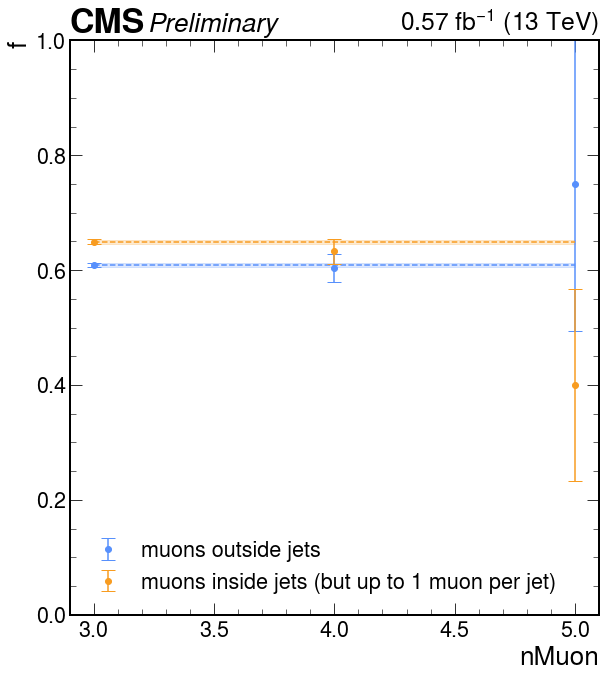

In [103]:
fig, ax = plt.subplots(figsize=(9, 10))

##################################################
# Data section
##################################################

process = "DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018"
hist_name = 'nMuon_inv_in_vs_nMuon_tight_in_vs_nMuon_inv_out_vs_nMuon_tight_out_vs_nMuon'

N = plots[process][hist_name]

nMuon_max = 5

####################################################################
# Section for muons outside jets
####################################################################

f_out_arr, delta_f_out_arr = [], []
for nMuon in range(3, nMuon_max+1):
    N_n = N[::sum, ::sum, ..., nMuon*1j]
    f_out, delta_f_out = get_f_in_out(N_n)
    f_out_arr.append(f_out)
    delta_f_out_arr.append(delta_f_out)
    
f_out_arr, delta_f_out_arr = np.array(f_out_arr), np.array(delta_f_out_arr)

weights = 1 / delta_f_out_arr**2
f_out_average = np.sum(weights * f_out_arr) / np.sum(weights)
delta_f_out_average = np.sqrt(1/np.sum(weights))

plt.hlines(f_out_average, 3, nMuon_max, linestyles="dashed", color='C0')
plt.fill_between(
    list(range(3, nMuon_max+1)),
    f_out_average - delta_f_out_average,
    f_out_average + delta_f_out_average,
    alpha=0.2,
    color='C0',
)

plt.errorbar(
    list(range(3, nMuon_max+1)), 
    f_out_arr, 
    yerr=delta_f_out_arr, 
    capsize=7, 
    marker='o', 
    linestyle="none", 
    label="muons outside jets", 
    color='C0',
)

####################################################################
# Section for muons inside jets
####################################################################

f_in_arr, delta_f_in_arr = [], []
for nMuon in range(3, nMuon_max+1):
    N_n = N[..., ::sum, ::sum, nMuon*1j]
    f_in, delta_f_in = get_f_in_out(N_n)
    f_in_arr.append(f_in)
    delta_f_in_arr.append(delta_f_in)

f_in_arr, delta_f_in_arr = np.array(f_in_arr), np.array(delta_f_in_arr)

weights = 1 / delta_f_in_arr**2
f_in_average = np.sum(weights * f_in_arr) / np.sum(weights)
delta_f_in_average = np.sqrt(1/np.sum(weights))

plt.hlines(f_in_average, 3, nMuon_max, linestyles="dashed", color='C1')
plt.fill_between(
    list(range(3, nMuon_max+1)),
    f_in_average - delta_f_in_average,
    f_in_average + delta_f_in_average,
    alpha=0.2,
    color='C1',
)

plt.errorbar(
    list(range(3, nMuon_max+1)), 
    f_in_arr, 
    yerr=delta_f_in_arr, 
    capsize=7, 
    marker='o', 
    linestyle="none", 
    label="muons inside jets (but up to 1 muon per jet)", 
    color='C1',
)

# General plotting stuff
plt.xlabel("nMuon")
plt.ylabel("f")
hep.cms.label(llabel="Preliminary", data=True, lumi=0.57, ax=ax)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

ZeroDivisionError: float division by zero

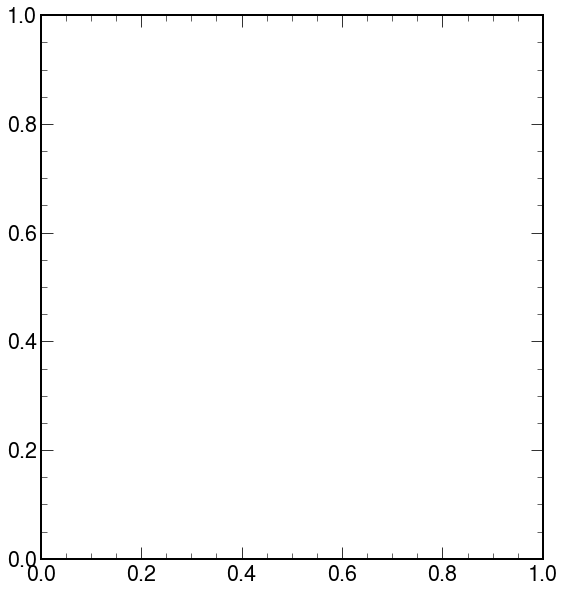

In [104]:
fig, ax = plt.subplots(figsize=(9, 10))

##################################################
# Data section
##################################################

process = "QCD_Pt_MuEnriched_2018"
hist_name = 'nMuon_inv_in_vs_nMuon_tight_in_vs_nMuon_inv_out_vs_nMuon_tight_out_vs_nMuon'

N = plots[process][hist_name]

nMuon_max = 5

####################################################################
# Section for muons outside jets
####################################################################

f_out_arr, delta_f_out_arr = [], []
for nMuon in range(3, nMuon_max+1):
    N_n = N[::sum, ::sum, ..., nMuon*1j]
    f_out, delta_f_out = get_f_in_out(N_n)
    f_out_arr.append(f_out)
    delta_f_out_arr.append(delta_f_out)
    
f_out_arr, delta_f_out_arr = np.array(f_out_arr), np.array(delta_f_out_arr)

weights = 1 / delta_f_out_arr**2
f_out_average = np.sum(weights * f_out_arr) / np.sum(weights)
delta_f_out_average = np.sqrt(1/np.sum(weights))

plt.hlines(f_out_average, 3, nMuon_max, linestyles="dashed", color='C0')
plt.fill_between(
    list(range(3, nMuon_max+1)),
    f_out_average - delta_f_out_average,
    f_out_average + delta_f_out_average,
    alpha=0.2,
    color='C0',
)

plt.errorbar(
    list(range(3, nMuon_max+1)), 
    f_out_arr, 
    yerr=delta_f_out_arr, 
    capsize=7, 
    marker='o', 
    linestyle="none", 
    label="muons outside jets", 
    color='C0',
)

####################################################################
# Section for muons inside jets
####################################################################

f_in_arr, delta_f_in_arr = [], []
for nMuon in range(3, nMuon_max+1):
    N_n = N[..., ::sum, ::sum, nMuon*1j]
    f_in, delta_f_in = get_f_in_out(N_n)
    f_in_arr.append(f_in)
    delta_f_in_arr.append(delta_f_in)

f_in_arr, delta_f_in_arr = np.array(f_in_arr), np.array(delta_f_in_arr)

weights = 1 / delta_f_in_arr**2
f_in_average = np.sum(weights * f_in_arr) / np.sum(weights)
delta_f_in_average = np.sqrt(1/np.sum(weights))

plt.hlines(f_in_average, 3, nMuon_max, linestyles="dashed", color='C1')
plt.fill_between(
    list(range(3, nMuon_max+1)),
    f_in_average - delta_f_in_average,
    f_in_average + delta_f_in_average,
    alpha=0.2,
    color='C1',
)

plt.errorbar(
    list(range(3, nMuon_max+1)), 
    f_in_arr, 
    yerr=delta_f_in_arr, 
    capsize=7, 
    marker='o', 
    linestyle="none", 
    label="muons inside jets (but up to 1 muon per jet)", 
    color='C1',
)

# General plotting stuff
plt.xlabel("nMuon")
plt.ylabel("f")
hep.cms.label(llabel="Preliminary", data=True, lumi=0.57, ax=ax)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

### Alright, now we need to generate the distributions....

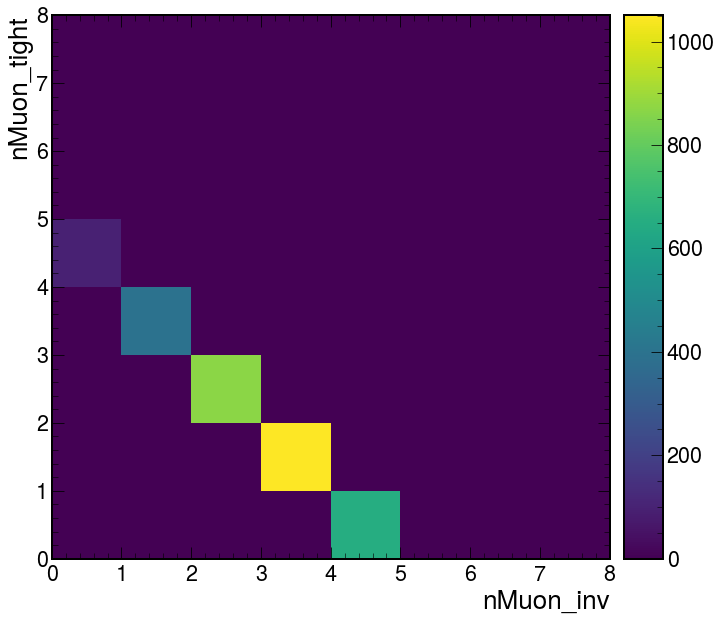

WeightedSum(value=870, variance=870)

WeightedSum(value=870, variance=870)

WeightedSum(value=870, variance=870)

WeightedSum(value=870, variance=870)

WeightedSum(value=870, variance=870)

WeightedSum(value=870, variance=870)

WeightedSum(value=870, variance=870)

WeightedSum(value=870, variance=870)

WeightedSum(value=870, variance=870)

WeightedSum(value=870, variance=870)

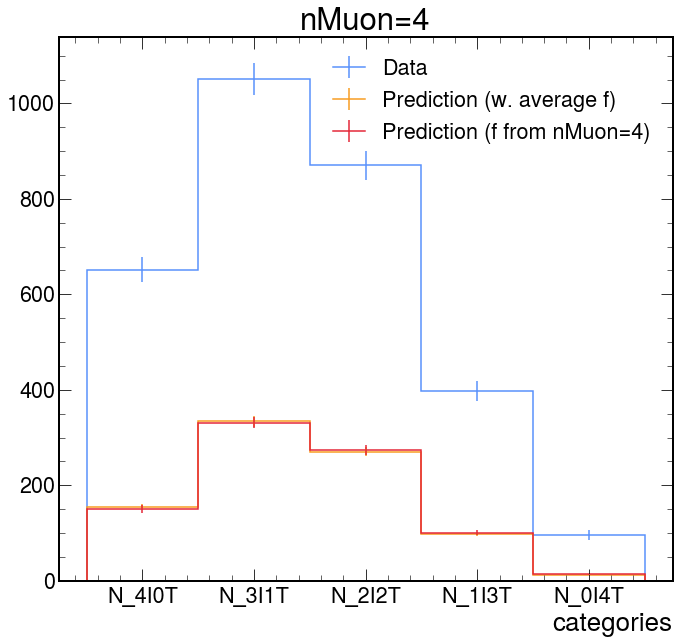

In [62]:
# Define stuff
process = "DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018"
hist_name = 'nMuon_inv_vs_nMuon_tight_vs_nMuon'
N = plots[process][hist_name]

# Get f value
f_arr, delta_f_arr = [], []
nMuon_max = 5
for nMuon in range(3, nMuon_max+1):
    N_n = N[..., nMuon*1j]
    f, delta_f = get_f_in_out(N_n)
    f_arr.append(f)
    delta_f_arr.append(delta_f)

f_arr, delta_f_arr = np.array(f_arr), np.array(delta_f_arr)
weights = 1 / delta_f_arr**2
f_average = np.sum(weights * f_arr) / np.sum(weights)
delta_f_average = np.sqrt(1/np.sum(weights))

# Do the estimation 
nMuon = 4
N_n = N[..., nMuon * 1j]
N_n.plot2d()
plt.show()

f_n = f_arr[nMuon-3]
delta_f_n = delta_f_arr[nMuon-3]

h_est_av = hist.Hist.new.StrCategory(
    [f"N_{nMuon-i}I{i}T" for i in range(nMuon+1)], name="categories"
).Weight()
h_est = hist.Hist.new.StrCategory(
    [f"N_{nMuon-i}I{i}T" for i in range(nMuon+1)], name="categories"
).Weight()
h_p = hist.Hist.new.StrCategory(
    [f"N_{nMuon-i}I{i}T" for i in range(nMuon+1)], name="categories"
).Weight()

for m in range(nMuon + 1):
    k = nMuon - m
    p, p_unc = N_n[m*1j, k*1j].value, np.sqrt(N_n[m*1j, k*1j].variance)
    est_n, est_unc_n = N_mIkT_est(m, k, f_n, delta_f_n, N_n)
    est_av, est_unc_av = N_mIkT_est(m, k, f_average, delta_f_average, N_n)
    h_est[f"N_{m}I{k}T"] = hist.accumulators.WeightedSum(est_n, est_unc_n**2)
    h_est_av[f"N_{m}I{k}T"] = hist.accumulators.WeightedSum(est_av, est_unc_av**2)
    h_p[f"N_{m}I{k}T"] = hist.accumulators.WeightedSum(p, p_unc**2)
    
fig, ax = plt.subplots(figsize=(11,10))
h_p.plot(label="Data")
h_est_av.plot(label="Prediction (w. average f)")
h_est.plot(label=f"Prediction (f from nMuon={nMuon})")
plt.legend()
plt.title(f"nMuon={nMuon}")
plt.show()

Now do the same but only for the out category

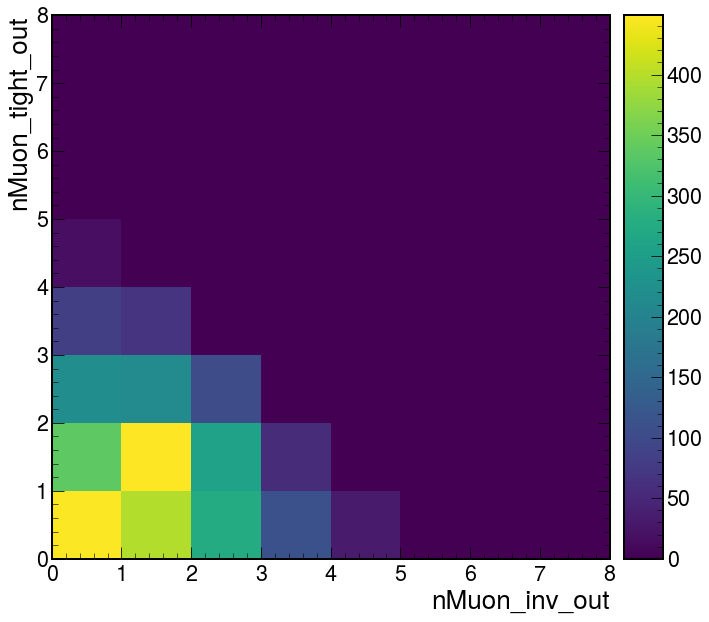

WeightedSum(value=998, variance=998)

WeightedSum(value=998, variance=998)

WeightedSum(value=998, variance=998)

WeightedSum(value=998, variance=998)

WeightedSum(value=998, variance=998)

WeightedSum(value=998, variance=998)

WeightedSum(value=998, variance=998)

WeightedSum(value=998, variance=998)

WeightedSum(value=998, variance=998)

WeightedSum(value=998, variance=998)

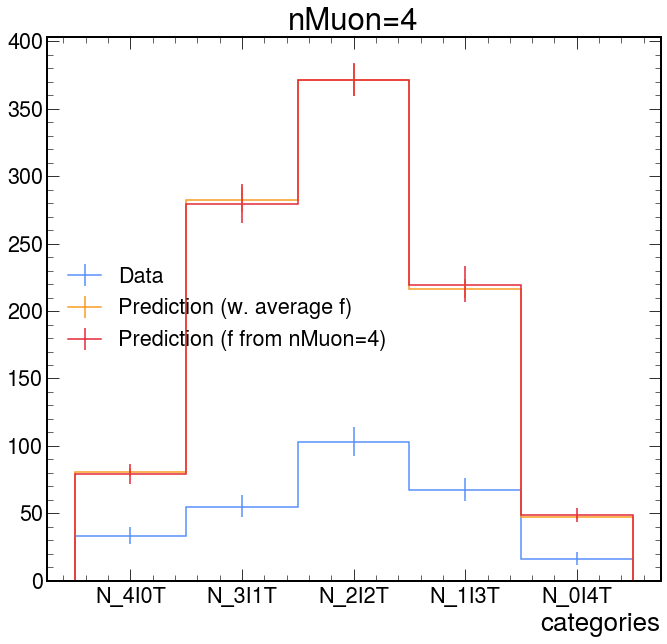

In [63]:
# Define stuff
process = "DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018"
hist_name = 'nMuon_inv_in_vs_nMuon_tight_in_vs_nMuon_inv_out_vs_nMuon_tight_out_vs_nMuon'
N = plots[process][hist_name][::sum, ::sum, ...]

# Get f value
f_arr, delta_f_arr = [], []
nMuon_max = 5
for nMuon in range(3, nMuon_max+1):
    N_n = N[..., nMuon*1j]
    f, delta_f = get_f_in_out(N_n)
    f_arr.append(f)
    delta_f_arr.append(delta_f)

f_arr, delta_f_arr = np.array(f_arr), np.array(delta_f_arr)
weights = 1 / delta_f_arr**2
f_average = np.sum(weights * f_arr) / np.sum(weights)
delta_f_average = np.sqrt(1/np.sum(weights))

# Do the estimation 
nMuon = 4
N_n = N[..., nMuon * 1j]
N_n.plot2d()
plt.show()

f_n = f_arr[nMuon-3]
delta_f_n = delta_f_arr[nMuon-3]

h_est_av = hist.Hist.new.StrCategory(
    [f"N_{nMuon-i}I{i}T" for i in range(nMuon+1)], name="categories"
).Weight()
h_est = hist.Hist.new.StrCategory(
    [f"N_{nMuon-i}I{i}T" for i in range(nMuon+1)], name="categories"
).Weight()
h_p = hist.Hist.new.StrCategory(
    [f"N_{nMuon-i}I{i}T" for i in range(nMuon+1)], name="categories"
).Weight()

for m in range(nMuon + 1):
    k = nMuon - m
    p, p_unc = N_n[m*1j, k*1j].value, np.sqrt(N_n[m*1j, k*1j].variance)
    est_n, est_unc_n = N_mIkT_est(m, k, f_n, delta_f_n, N_n)
    est_av, est_unc_av = N_mIkT_est(m, k, f_average, delta_f_average, N_n)
    h_est[f"N_{m}I{k}T"] = hist.accumulators.WeightedSum(est_n, est_unc_n**2)
    h_est_av[f"N_{m}I{k}T"] = hist.accumulators.WeightedSum(est_av, est_unc_av**2)
    h_p[f"N_{m}I{k}T"] = hist.accumulators.WeightedSum(p, p_unc**2)
    
fig, ax = plt.subplots(figsize=(11,10))
h_p.plot(label="Data")
h_est_av.plot(label="Prediction (w. average f)")
h_est.plot(label=f"Prediction (f from nMuon={nMuon})")
plt.legend()
plt.title(f"nMuon={nMuon}")
plt.show()

And now the muons inside jets

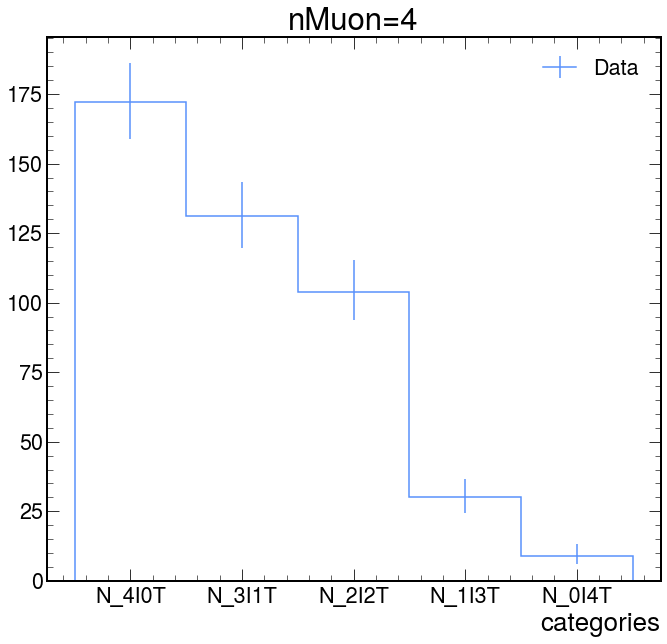

In [67]:
# Define stuff
process = "DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018"
hist_name = 'nMuon_inv_in_vs_nMuon_tight_in_vs_nMuon_inv_out_vs_nMuon_tight_out_vs_nMuon'
N = plots[process][hist_name][:, :, ::sum, ::sum, :]


# Do the estimation 
nMuon = 4
N_n = N[..., nMuon * 1j]

h_p = hist.Hist.new.StrCategory(
    [f"N_{nMuon-i}I{i}T" for i in range(nMuon+1)], name="categories"
).Weight()

for m in range(nMuon + 1):
    k = nMuon - m    
    p, p_unc = N_n[m*1j, k*1j].value, np.sqrt(N_n[m*1j, k*1j].variance)
    est_n, est_unc_n = N_mIkT_est(m, k, f_n, delta_f_n, N_n)
    est_av, est_unc_av = N_mIkT_est(m, k, f_average, delta_f_average, N_n)
    h_est[f"N_{m}I{k}T"] = hist.accumulators.WeightedSum(est_n, est_unc_n**2)
    h_est_av[f"N_{m}I{k}T"] = hist.accumulators.WeightedSum(est_av, est_unc_av**2)
    h_p[f"N_{m}I{k}T"] = hist.accumulators.WeightedSum(p, p_unc**2)
    
fig, ax = plt.subplots(figsize=(11,10))
h_p.plot(label="Data")
plt.legend()
plt.title(f"nMuon={nMuon}")
plt.show()

In [34]:
N

Hist(
  Regular(8, 0, 8, name='nMuon_inv_in'),
  Regular(8, 0, 8, name='nMuon_tight_in'),
  Regular(8, 0, 8, name='nMuon_inv_out'),
  Regular(8, 0, 8, name='nMuon_tight_out'),
  storage=Weight()) # Sum: WeightedSum(value=156356, variance=156356)

In [76]:
def binomial_dist(k, n, f):
    m = n - k
    return binom(n, k) * (1 - f)**m * f**k

def N_in_out_est(k_in, m_in, k_out, m_out, f_in, delta_f_in, f_out, delta_f_out, norm):
    """
    Predict the bins with k_in tight (m_in inverse) in jets and k_out tight (m_out inverse) out of jets.
    The norm is the sum of events with (k_in + m_in) in jets & (k_out + m_out) out of jets.
    The formula to be used is:
        binomial_dist(k_out, k_out+m_out, f_out) * binomial_dist(k_out, k_out+m_out, f_out) * norm
    """
    n_in = m_in + k_in
    n_out = m_out + k_out
    value = binomial_dist(k_in, n_in, f_in) * binomial_dist(k_out, n_out, f_out) * norm.value
    
    dN_df_in = (
        binom(n_in, k_in) * (k_in - n_in * f_in) * (1 - f_in)**(m_in - 1) * f_in**(k_in - 1) 
        * binomial_dist(k_out, n_out, f_out) 
        * norm.value
    )
    dN_df_out = (
        binomial_dist(k_in, n_in, f_in) 
        * binom(n_out, k_out) * (k_out - n_out * f_out) * (1 - f_out)**(m_out - 1) * f_in**(k_out - 1) 
        * norm.value
    )
    dN_dnorm = binomial_dist(k_in, n_in, f_in) * binomial_dist(k_out, n_out, f_out)
    unc = np.sqrt((dN_df_in * delta_f_in)**2 + (dN_df_out * delta_f_out)**2 + dN_dnorm**2 * norm.variance)

    return value, unc**2

There are two different kinds of sums:

    a. The number of events with m inverse and k tight (total)
    b. The number of events with i in-jet and j out-of-jet

In [26]:
def get_N_mIkT(N, m, k):
    """
    Will get the number of events with m inverse k tight
    """
    N_mIkT = hist.accumulators.WeightedSum(0, 0)
    for i in range(m + 1):
        for j in range(k + 1):
            N_mIkT += N[i * 1j, j * 1j, (m - i) * 1j, (k - j) * 1j]
    return N_mIkT

def get_N_n_in_n_out(N, n_in, n_out):
    """
    Will get the number of events with n_in in-jet n_out out-of-jet
    """
    N_n_in_n_out = hist.accumulators.WeightedSum(0, 0)
    for i in range(n_in + 1):
        for j in range(n_out + 1):
            N_n_in_n_out += N[i * 1j, (n_in - i) * 1j, j * 1j, (n_out - j) * 1j]
    return N_n_in_n_out

WeightedSum(value=54, variance=54)

WeightedSum(value=54, variance=17.8917)

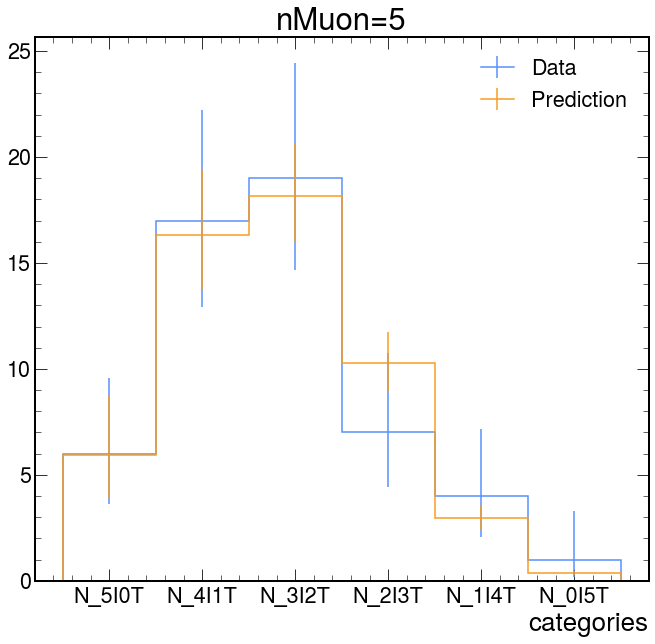

In [87]:
# Define stuff
process = "DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018"
hist_name = 'nMuon_inv_in_vs_nMuon_tight_in_vs_nMuon_inv_out_vs_nMuon_tight_out_vs_nMuon'
N = plots[process][hist_name]

# Pick nMuon bin
nMuon = 5
N = N[..., nMuon * 1j]

# Estimate f_out & f_in
f_out, delta_f_out = get_f_in_out(N[::sum, ::sum, :, :])
f_in, delta_f_in = get_f_in_out(N[:, :, ::sum, ::sum])

h_data = hist.Hist.new.StrCategory(
    [f"N_{nMuon - i}I{i}T" for i in range(nMuon+1)], name="categories"
).Weight()
h_pred = h_data.copy()

# Now to get each bin with nInverse & nTight
for nInverse in range(nMuon + 1):
    nTight = nMuon - nInverse
    
    # First, populate the data histogram
    h_data[f'N_{nInverse}I{nTight}T'] = get_N_mIkT(N, nInverse, nTight)
    
    # Then, build the estimate
    N_mIkT = hist.accumulators.WeightedSum(0, 0)
    for i in range(nInverse + 1):
        for j in range(nTight + 1):
            n_in = i + j
            n_out = nInverse + nTight - i - j
            N_n_in_n_out = get_N_n_in_n_out(N, n_in, n_out)
            estimate = N_in_out_est(
                j, i, nTight - j, nInverse - i, f_in, delta_f_in, f_out, delta_f_out, N_n_in_n_out
            )
            N_mIkT = hist.accumulators.WeightedSum(
                N_mIkT.value + estimate[0], N_mIkT.variance + estimate[1]
            )
    h_pred[f'N_{nInverse}I{nTight}T'] = N_mIkT

print(h_data.sum())
print(h_pred.sum())

fig, ax = plt.subplots(figsize=(11,10))
h_data.plot(label="Data")
h_pred.plot(label=f"Prediction")
plt.legend()
plt.title(f"nMuon={nMuon}")
plt.show()

WeightedSum(value=17.1294, variance=173.049)

WeightedSum(value=17.1294, variance=155.079)

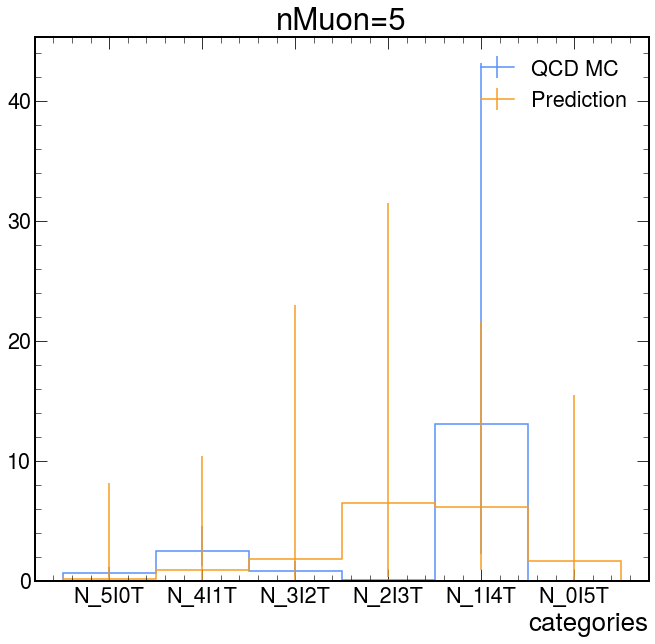

In [88]:
# Define stuff
process = "QCD_Pt_MuEnriched_2018"
hist_name = 'nMuon_inv_in_vs_nMuon_tight_in_vs_nMuon_inv_out_vs_nMuon_tight_out_vs_nMuon'
N = plots[process][hist_name]

# Pick nMuon bin
nMuon = 5
N = N[..., nMuon * 1j]

# Estimate f_out & f_in
f_out, delta_f_out = get_f_in_out(N[::sum, ::sum, :, :])
f_in, delta_f_in = get_f_in_out(N[:, :, ::sum, ::sum])

h_data = hist.Hist.new.StrCategory(
    [f"N_{nMuon - i}I{i}T" for i in range(nMuon+1)], name="categories"
).Weight()
h_pred = h_data.copy()

# Now to get each bin with nInverse & nTight
for nInverse in range(nMuon + 1):
    nTight = nMuon - nInverse
    
    # First, populate the data histogram
    h_data[f'N_{nInverse}I{nTight}T'] = get_N_mIkT(N, nInverse, nTight)
    
    # Then, build the estimate
    N_mIkT = hist.accumulators.WeightedSum(0, 0)
    for i in range(nInverse + 1):
        for j in range(nTight + 1):
            n_in = i + j
            n_out = nInverse + nTight - i - j
            N_n_in_n_out = get_N_n_in_n_out(N, n_in, n_out)
            estimate = N_in_out_est(
                j, i, nTight - j, nInverse - i, f_in, delta_f_in, f_out, delta_f_out, N_n_in_n_out
            )
            N_mIkT = hist.accumulators.WeightedSum(
                N_mIkT.value + estimate[0], N_mIkT.variance + estimate[1]
            )
    h_pred[f'N_{nInverse}I{nTight}T'] = N_mIkT

print(h_data.sum())
print(h_pred.sum())

fig, ax = plt.subplots(figsize=(11,10))
h_data.plot(label="QCD MC")
h_pred.plot(label=f"Prediction")
plt.legend()
plt.title(f"nMuon={nMuon}")
plt.show()

In [38]:
f_out

0.46678557187658287

In [40]:
f_in

0.2742816223728861

In [48]:
N_mIkT

1032.9365082140966

Hist(
  Regular(8, 0, 8, name='nMuon_inv_in'),
  Regular(8, 0, 8, name='nMuon_tight_in'),
  Regular(8, 0, 8, name='nMuon_inv_out'),
  Regular(8, 0, 8, name='nMuon_tight_out'),
  storage=Weight()) # Sum: WeightedSum(value=156356, variance=156356)